In [1]:
%pip install tensorflow
%pip install numpy
%pip install matplotlib

  Using cached absl_py-2.3.0-py3-none-any.whl.metadata (2.4 kB)
  Using cached astunparse-1.6.3-py2.py3-none-any.whl.metadata (4.4 kB)
  Using cached flatbuffers-25.2.10-py2.py3-none-any.whl.metadata (875 bytes)
  Using cached gast-0.6.0-py3-none-any.whl.metadata (1.3 kB)
  Using cached google_pasta-0.2.0-py3-none-any.whl.metadata (814 bytes)
  Using cached libclang-18.1.1-py2.py3-none-win_amd64.whl.metadata (5.3 kB)
  Using cached opt_einsum-3.4.0-py3-none-any.whl.metadata (6.3 kB)
  Using cached termcolor-3.1.0-py3-none-any.whl.metadata (6.4 kB)
  Using cached tensorboard-2.19.0-py3-none-any.whl.metadata (1.8 kB)
  Using cached keras-3.10.0-py3-none-any.whl.metadata (6.0 kB)
  Using cached tensorboard_data_server-0.7.2-py3-none-any.whl.metadata (1.1 kB)
  Using cached namex-0.1.0-py3-none-any.whl.metadata (322 bytes)
   ---------------------------------------- 0.0/375.7 MB ? eta -:--:--
   ---------------------------------------- 2.4/375.7 MB 12.2 MB/s eta 0:00:31
   ----------------

In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

# Fashion MNIST-Datensatz laden
fashion_mnist = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

# Klassenbezeichnungen
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# Daten vorverarbeiten
train_images = train_images / 255.0
test_images = test_images / 255.0

# Modell erstellen
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10)
])

# Modell kompilieren
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])


c:\Users\andre\anaconda3\envs\clothes_env\lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [3]:
# Modell trainieren
history = model.fit(train_images, train_labels, epochs=10, 
                    validation_data=(test_images, test_labels))

# Modell evaluieren
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print(f'\nTestgenauigkeit: {test_acc:.4f}')

# Vorhersage für ein einzelnes Bild
probability_model = tf.keras.Sequential([model, tf.keras.layers.Softmax()])
predictions = probability_model.predict(test_images)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7837 - loss: 0.6227 - val_accuracy: 0.8567 - val_loss: 0.4077
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8642 - loss: 0.3721 - val_accuracy: 0.8643 - val_loss: 0.3759
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8770 - loss: 0.3352 - val_accuracy: 0.8684 - val_loss: 0.3660
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.8859 - loss: 0.3108 - val_accuracy: 0.8520 - val_loss: 0.3912
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.8937 - loss: 0.2898 - val_accuracy: 0.8717 - val_loss: 0.3592
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.8975 - loss: 0.2742 - val_accuracy: 0.8683 - val_loss: 0.3727
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9002 - loss: 0.2671 - val_accuracy: 0.8718 - val_loss: 0.3527
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9054 - loss: 0.2524 - 

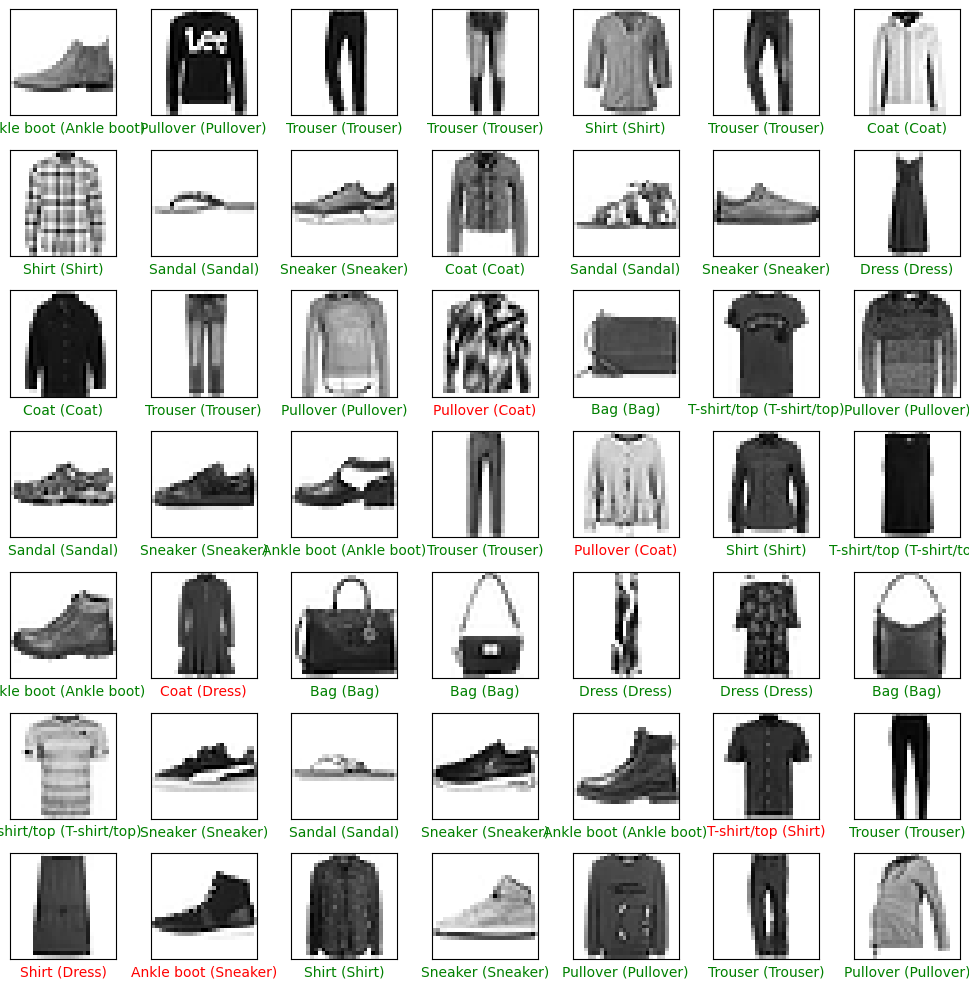

In [7]:
# Visualisierung der ersten 49 Testbilder mit Vorhersagen
plt.figure(figsize=(10,10))
for i in range(49):
    plt.subplot(7,7,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(test_images[i], cmap=plt.cm.binary)

    predicted_label = np.argmax(predictions[i])
    true_label = test_labels[i]

    color = 'green' if predicted_label == true_label else 'red'
    plt.xlabel(f"{class_names[predicted_label]} ({class_names[true_label]})", color=color)

plt.tight_layout()
plt.show()

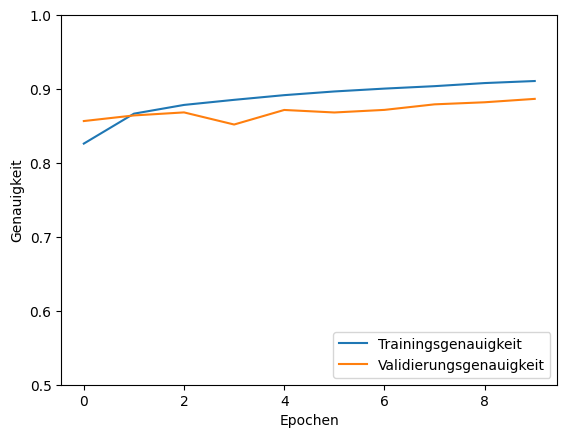

In [9]:
# Trainingsverlauf visualisieren
plt.plot(history.history['accuracy'], label='Trainingsgenauigkeit')
plt.plot(history.history['val_accuracy'], label='Validierungsgenauigkeit')
plt.xlabel('Epochen')
plt.ylabel('Genauigkeit')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')
plt.show()